# Task

In [26]:
import numpy as np
import cv2
from IPython.display import Image

UBIT = "dishameh"
np.random.seed(sum([ord(c) for
c in UBIT]))

## Task

In [27]:
img1 = cv2.imread('mountain1.jpg')
img2 = cv2.imread('mountain2.jpg')

sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
keypoint_1, descriptor_1 = sift.detectAndCompute(img1,None)
keypoint_2, descriptor_2 = sift.detectAndCompute(img2,None)

img3=cv2.drawKeypoints(img1,keypoint_1,None)
cv2.imwrite('task1_sift1.jpg',img3)

img4=cv2.drawKeypoints(img2,keypoint_2,None)
cv2.imwrite('task1_sift2.jpg',img4)

True

### Image of Mountain 1 feature identification:

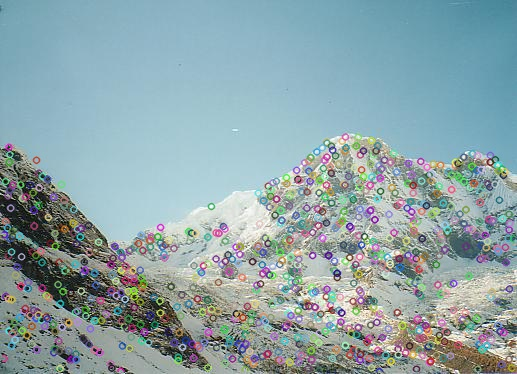

In [86]:
Image(filename ="task1_sift1.jpg", width=400, height=400)

### Image of Mountain 2 feature identification:

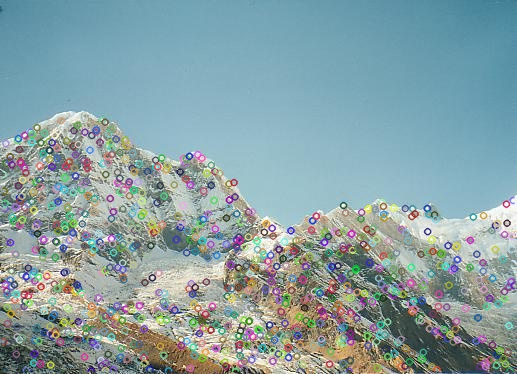

In [65]:
Image(filename ="task1_sift2.jpg", width=400, height=400)

## Task

In [30]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=10)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(descriptor_1,descriptor_2,k=2)

# ratio test as per Lowe's paper
good_1=[]
good_2=[]
for m,n in matches:
    if m.distance < 0.75*n.distance:
#        matchesMask[i]=[1,0]
        good_1.append([m])
        good_2.append(m)


img5 = cv2.drawMatchesKnn(img1,keypoint_1,img2,keypoint_2,good_1,None,flags=2)
cv2.imwrite('task1_matches_knn.jpg',img5)

True

### Image of matches between mountain 1 and mountain 2:

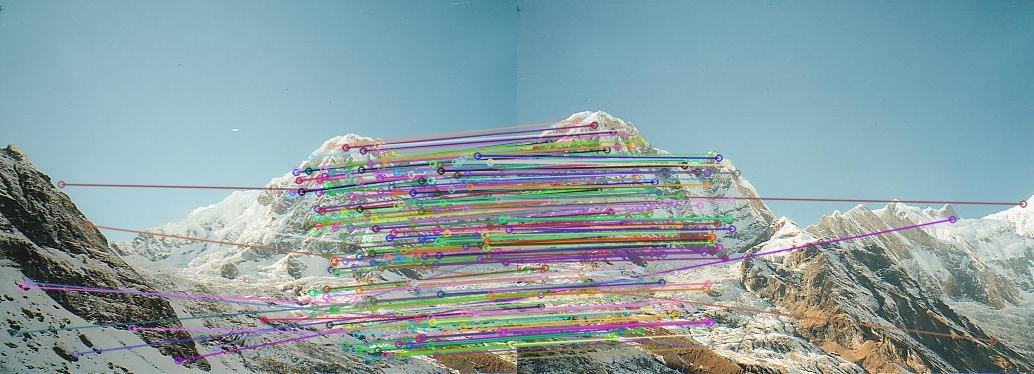

In [67]:
Image(filename ="task1_matches_knn.jpg", width=1000, height=400)

## Task

In [35]:
src_pts = np.float32([ keypoint_1[m.queryIdx].pt 
                      for m in good_2 ]).reshape(-1,1,2)
dst_pts = np.float32([ keypoint_2[m.trainIdx].pt 
                      for m in good_2 ]).reshape(-1,1,2)
#print(src_pts)

H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

print("Homography Matrix:\n",H)

Homography Matrix:
 [[ 1.58786657e+00 -2.91341208e-01 -3.95583761e+02]
 [ 4.48004510e-01  1.43143794e+00 -1.90355099e+02]
 [ 1.20776594e-03 -5.90711844e-05  1.00000000e+00]]


## Task

In [36]:
matchesMask = mask.ravel().tolist()
ind_random=np.random.choice(good_2,10)

random_mask=np.random.choice(matchesMask,10)
print(ind_random[0])

draw_params = dict(matchColor=(0, 0, 255), singlePointColor=None, 
                   matchesMask=random_mask.tolist(), flags=2)

img6=cv2.drawMatches(img1,keypoint_1,img2,keypoint_2,
                     ind_random,None,**draw_params)
cv2.imwrite('task1_matches.jpg',img6)

<DMatch 00000198C2FB5E70>


True

### Image of 10 random matches between mountain 1 and mountain 2:

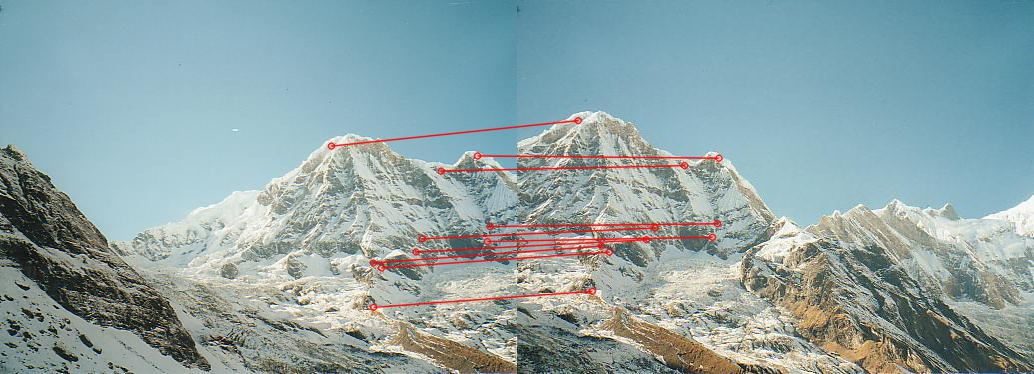

In [68]:
Image(filename ="task1_matches.jpg", width=1000, height=400)

## Task

In [38]:
rows1, cols1 = img1.shape[:2]
rows2, cols2 = img2.shape[:2]

list_of_points_1 = np.float32([[0,0], [0,rows1], [cols1, rows1], 
                               [cols1,0]]).reshape(-1,1,2)
temp_points = np.float32([[0,0], [0,rows2], [cols2, rows2], 
                          [cols2,0]]).reshape(-1,1,2)

list_of_points_2 = cv2.perspectiveTransform(temp_points, H)
list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

[x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
[x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

translation_dist = [-x_min, -y_min]
H_translation = np.array([[1, 0, translation_dist[0]], 
                          [0, 1, translation_dist[1]], [0,0,1]])

img7 = cv2.warpPerspective(img1, H_translation.dot(H), 
                           (x_max - x_min, y_max - y_min))

img7[translation_dist[1]:rows1+translation_dist[1],
     translation_dist[0]:cols1+translation_dist[0]] = img2

cv2.imwrite('task1_pano.jpg',img7)

True

### Image of the mountains warped

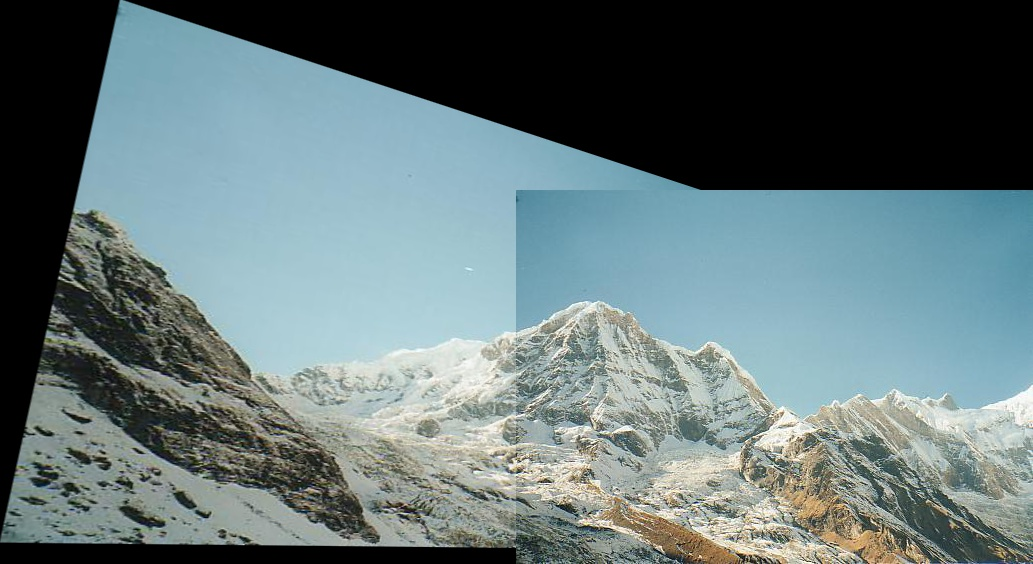

In [82]:
Image(filename ="task1_pano.jpg", width=1000, height=1000)

# Task

In [40]:
import cv2
import numpy as np

UBIT = "dishameh"
np.random.seed(sum([ord(c) for
c in UBIT]))

## Task

In [41]:
img1 = cv2.imread('tsucuba_left.png')  #Left
img2 = cv2.imread('tsucuba_right.png') #Right

sift = cv2.xfeatures2d.SIFT_create()

#Keypoints and descriptors with SIFT
keypoint_1, descriptor_1 = sift.detectAndCompute(img1,None)
keypoint_2, descriptor_2 = sift.detectAndCompute(img2,None)

img3=cv2.drawKeypoints(img1,keypoint_1,None)
cv2.imwrite('task2_sift1.jpg',img3)

img4=cv2.drawKeypoints(img2,keypoint_2,None)
cv2.imwrite('task2_sift2.jpg',img4)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(descriptor_1,descriptor_2,k=2)

good_1 = []
good_2= []

# ratio test as per Lowe's paper
for (m,n) in matches:
    if m.distance < 0.75*n.distance:
        good_1.append([m])
        good_2.append(m)

img5 = cv2.drawMatchesKnn(img1,keypoint_1,img2,keypoint_2,good_1,None,flags=2)
cv2.imwrite('task2_matches_knn.jpg',img5)

True

### Image of Tscuba left feature identification:

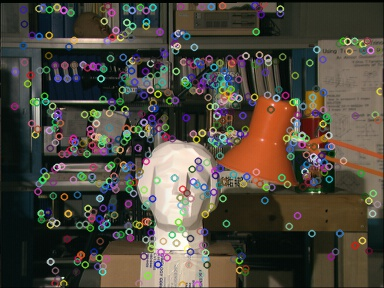

In [76]:
Image(filename ="task2_sift1.jpg", width=400, height=400)

### Image of Tscuba right feature identification:

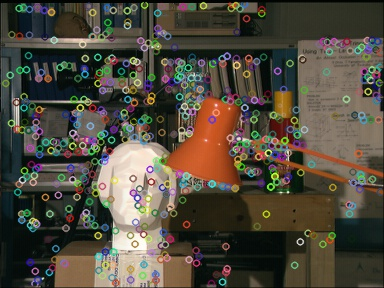

In [77]:
Image(filename ="task2_sift2.jpg", width=400, height=400)

### Image of matches between Tscuba left and Tscuba right:

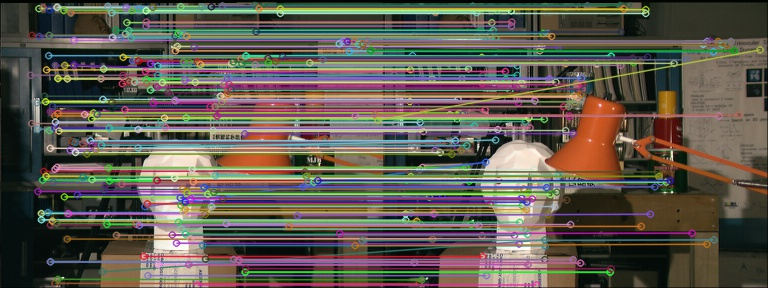

In [44]:
Image(filename ="task2_matches_knn.jpg", width=1000, height=1000)

## Task

In [46]:
#Task 2.2

src_pts = np.float32([ keypoint_1[m.queryIdx].pt 
                      for m in good_2 ]).reshape(-1,1,2)

dst_pts = np.float32([ keypoint_2[m.trainIdx].pt 
                      for m in good_2 ]).reshape(-1,1,2)

pts1=np.int32(src_pts)
pts2=np.int32(dst_pts)

F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_RANSAC)
print("Fundamental Matrix:\n", F)

Fundamental Matrix:
 [[-2.12607354e-06 -8.10713687e-05  7.47530309e-02]
 [ 4.60726414e-05  3.79326900e-05  1.32728554e+00]
 [-7.52042326e-02 -1.32608913e+00  1.00000000e+00]]


## Task

In [49]:
# We select only inlier points
pts_1 = pts1[mask.ravel()==1]
pts_2 = pts2[mask.ravel()==1]   

ind_random=np.random.choice(good_2,10)
##print(ind_random)


def drawlines(img1,img2,lines,pts1,pts2):
    r,c = img1.shape[:2]
    count=0
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = color_line[count]
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1[0]),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2[0]),5,color,-1)
        count=count+1
    return img1,img2

# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
color_line=[]
for i in range(0,10):
    color_line.append(tuple(np.random.randint(0,255,3).tolist()))

lines1 = cv2.computeCorrespondEpilines(pts_2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts_1[:10],pts_2[:10])

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts_1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts_2[:10],pts_1[:10])

cv2.imwrite('task2_epi_left.jpg',img5)
cv2.imwrite('task2_epi_right.jpg',img3)

True

### Image of epipolar left:

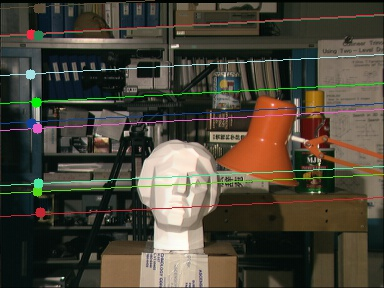

In [79]:
Image(filename ="task2_epi_left.jpg", width=400, height=400)

### Image of epipolar right:

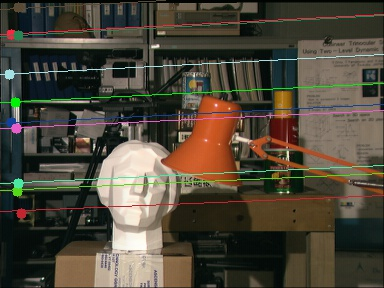

In [80]:
Image(filename ="task2_epi_right.jpg", width=400, height=400)

## Task

In [60]:
stereoMatcher = cv2.StereoBM_create(numDisparities=64, blockSize=15)    

imgL=cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
imgR=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

disparity_img = stereoMatcher.compute(imgL,imgR)

largest_num = disparity_img[0][0]
for row_idx, row in enumerate(disparity_img):
    for col_idx, num in enumerate(row):
        if num > largest_num:
            largest_num = num
large_val = largest_num

row = disparity_img.shape[0]
col = disparity_img.shape[1]
for i in range(row):
    for j in range(col):
        disparity_img[i][j] = (disparity_img[i][j]/large_val)*255

disparity_normalize=disparity_img

cv2.imwrite('task2_disparity.jpg',disparity_normalize)

True

### Image disparity:

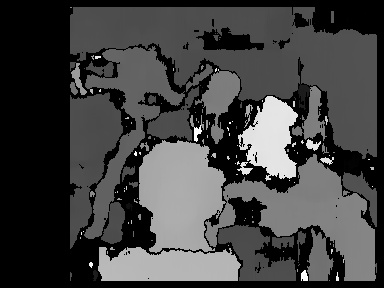

In [81]:
Image(filename ="task2_disparity.jpg", width=400, height=400)

# Task

## Task

Here we have included the basic libraries

In [2]:
import numpy as np
from numpy import reshape
import cv2
from matplotlib import pyplot as plt

UBIT = "dishameh"
np.random.seed(sum([ord(c) for
c in UBIT]))

Put the data points specified in the question in different lists that is list specifying the x and y axis values of the different data points. We specify the lists of the 3 centroids as mentioned as well.  

In [3]:
data_point_x=[5.9,4.6,6.2,4.7,5.5,5.0,4.9,6.7,5.1,6.0]
data_point_y=[3.2,2.9,2.8,3.2,4.2,3.0,3.1,3.1,3.8,3.0]
centroids=[[6.2,3.2],[6.6,3.7],[6.5,3.0]]
points=np.array(list(zip(data_point_x,data_point_y)))
# print("Data points are:", data_point_x[])
centroid = np.array(centroids)
# print("Centroids are:",centroid)

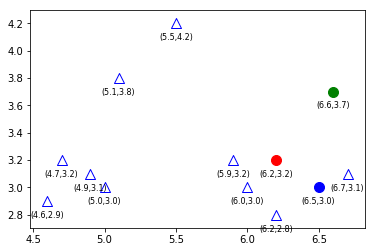

In [4]:
plt.scatter(data_point_x, data_point_y, c='white', s=100, marker="^"
            ,edgecolors='blue')
for i in range(len(data_point_x)):
    plt.text(data_point_x[i]-0.12, data_point_y[i]-0.12,
             "("+str(data_point_x[i])+","+str(data_point_y[i])+")", fontsize=8)

colors=['red','green','blue']
for i in range(0,3):
    plt.scatter(centroids[i][0],centroids[i][1], c=colors[i],s=100,marker="o"
                ,edgecolors=colors[i])
    plt.text(centroids[i][0]-0.12, centroids[i][1]-0.12,
             "("+str(centroid[i][0])+","+str(centroid[i][1])+")", fontsize=8)

In [5]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [6]:
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(points))
# print("Initial Clusters:",clusters)
# Assigning each value to its closest cluster
for i in range(len(points)):
    distances = dist(points[i], centroid)
#     print("Distances:", distances)
    cluster = np.argmin(distances)
    clusters[i] = cluster
print("Classification Vector:",clusters)

Classification Vector: [0. 0. 2. 0. 1. 0. 0. 2. 0. 0.]


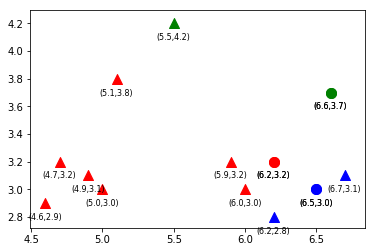

In [7]:
colors = ['red', 'green', 'blue']
# fig, ax = plt.subplots()
for i in range(len(points)):
    if clusters[i]==0:
        plt.scatter(points[i][0],points[i][1], c=colors[0],s=100,marker="^"
                    ,edgecolors=colors[0])
        plt.text(points[i][0]-0.12, points[i][1]-0.12,
             "("+str(points[i][0])+","+str(points[i][1])+")", fontsize=8)

    elif clusters[i]==1:
        plt.scatter(points[i][0],points[i][1], c=colors[1],s=100,marker="^"
                    ,edgecolors=colors[1])
        plt.text(points[i][0]-0.12, points[i][1]-0.12,
             "("+str(points[i][0])+","+str(points[i][1])+")", fontsize=8)

    else:
        plt.scatter(points[i][0],points[i][1], c=colors[2],s=100,marker="^"
                    ,edgecolors=colors[2])
        plt.text(points[i][0]-0.12, points[i][1]-0.12,
             "("+str(points[i][0])+","+str(points[i][1])+")", fontsize=8)


        for i in range(0,3):
            plt.scatter(centroids[i][0],centroids[i][1], c=colors[i],s=100,marker="o"
                ,edgecolors=colors[i])
            plt.text(centroids[i][0]-0.12, centroids[i][1]-0.12,
             "("+str(centroid[i][0])+","+str(centroid[i][1])+")", fontsize=8)

plt.savefig('task3_iter1_a.jpg',dpi=500)

## Task

New centroids after one iteration:
 [[5.17142857 3.17142857]
 [5.5        4.2       ]
 [6.45       2.95      ]]


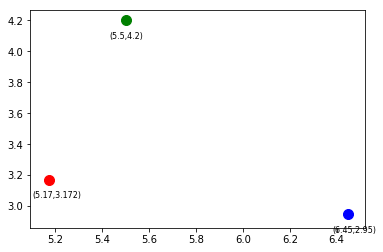

In [8]:
new_centroids = np.zeros(centroid.shape)
# print(new_centroids)
# Finding the new centroids by taking the average value
colors = ['red', 'green', 'blue']
for i in range(3):
        data_points = [points[j] for j in range(len(points)) if clusters[j] == i]
        new_centroids[i] = np.mean(data_points, axis=0)
for i in range(0,3):
    plt.scatter(new_centroids[i][0],new_centroids[i][1], c=colors[i],s=100,marker="o"
                ,edgecolors=colors[i])
    plt.text(new_centroids[i][0]-0.07, new_centroids[i][1]-0.12,
             "("+str(np.float16(new_centroids[i][0]))+","+str(np.float16(new_centroids[i][1]))+")", fontsize=8)
print("New centroids after one iteration:\n", new_centroids)

plt.savefig('task3_iter1_b.jpg',dpi=500)

# Cluster Lables(0, 1, 2)
# print("Clusters:")
new_clusters = np.zeros(len(points))
# print("Initial Clusters:",clusters)
# Assigning each value to its closest cluster
for i in range(len(points)):
    distances = dist(points[i], new_centroids)
#     print("Distances:", distances)
    new_cluster = np.argmin(distances)
    new_clusters[i] = new_cluster
# print("Classification Vector:",new_clusters)

## Task

New centroids after second iteration:
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]


Classification Vector after second iteration:
 [2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]

Centroids after second iteration


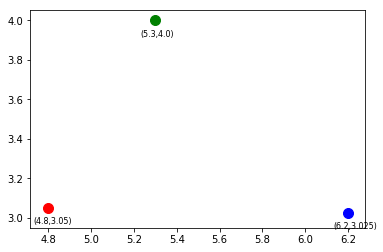

In [9]:
new_centroids_1 = np.zeros(centroid.shape)
# print(new_centroids_1)
# Finding the new centroids by taking the average value
colors = ['red', 'green', 'blue']
for i in range(3):
        data_points = [points[j] for j in range(len(points)) if new_clusters[j] == i]
        new_centroids_1[i] = np.mean(data_points, axis=0)
for i in range(0,3):
    plt.scatter(new_centroids_1[i][0],new_centroids_1[i][1], c=colors[i],s=100,marker="o"
                ,edgecolors=colors[i])
    plt.text(new_centroids_1[i][0]-0.07, new_centroids_1[i][1]-0.08,
             "("+str(np.float32(new_centroids_1[i][0]))+","
             +str(np.float32(new_centroids_1[i][1]))+")", fontsize=8)
print("New centroids after second iteration:\n", new_centroids_1)
print("\n")
plt.savefig('task3_iter2_a.jpg',dpi=500)

# print("New Clusters")
new_clusters_1 = np.zeros(len(points))
# print("Initial Clusters:",new_clusters)
# Assigning each value to its closest cluster
for i in range(len(points)):
    distances = dist(points[i], new_centroids_1)
#     print("Distances:", distances)
    new_cluster_1 = np.argmin(distances)
    new_clusters_1[i] = new_cluster_1
print("Classification Vector after second iteration:\n",new_clusters_1)

print("\nCentroids after second iteration")

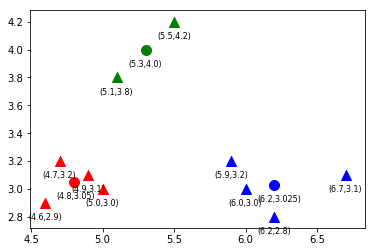

In [10]:
colors = ['red', 'green', 'blue']
# fig, ax = plt.subplots()
for i in range(len(points)):
    if new_clusters_1[i]==0:
        plt.scatter(points[i][0],points[i][1], c=colors[0],s=100,marker="^"
                    ,edgecolors=colors[0])
        plt.text(points[i][0]-0.12, points[i][1]-0.12,
             "("+str(points[i][0])+","+str(points[i][1])+")", fontsize=8)

    elif new_clusters_1[i]==1:
        plt.scatter(points[i][0],points[i][1], c=colors[1],s=100,marker="^"
                    ,edgecolors=colors[1])
        plt.text(points[i][0]-0.12, points[i][1]-0.12,
             "("+str(points[i][0])+","+str(points[i][1])+")", fontsize=8)

    else:
        plt.scatter(points[i][0],points[i][1], c=colors[2],s=100,marker="^"
                    ,edgecolors=colors[2])
        plt.text(points[i][0]-0.12, points[i][1]-0.12,
             "("+str(points[i][0])+","+str(points[i][1])+")", fontsize=8)

for i in range(0,3):
    plt.scatter(new_centroids_1[i][0],new_centroids_1[i][1], c=colors[i],s=100,marker="o"
                ,edgecolors=colors[i])
    plt.text(new_centroids_1[i][0]-0.12, new_centroids_1[i][1]-0.12,
             "("+str(np.float32(new_centroids_1[i][0]))+","+str(np.float32(new_centroids_1[i][1]))+")", fontsize=8)

    
plt.savefig('task3_iter2_b.jpg',dpi=500)

## Task

In [118]:
img = cv2.imread('baboon.jpg')
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

pixel = img.reshape((img.shape[0]*img.shape[1],3))

point_x=[]
point_y=[]
point_z=[]
for i in range(0,262144):
    point_x.append(pixel[i][0]) 
    point_y.append(pixel[i][1])
    point_z.append(pixel[i][2])
points = np.array(list(zip(point_x, point_y,point_z)))

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

### K=3

In [110]:
# Number of clusters
k =3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(points)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(points)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
C_z = np.random.randint(0, np.max(points)-20, size=k)
C = np.array(list(zip(C_x, C_y, C_z)), dtype=np.float32)

In [ ]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(points))
# print(clusters.shape)
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(points)):
        distances = dist(points[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = C.copy()
#     print(clusters)
    # Finding the new centroids by taking the average value
    for i in range(k):
        n_points = [points[j] for j in range(len(points)) if clusters[j] == i]
        C[i] = np.nanmean(n_points, axis=0)
#         print(C)
    error = dist(C, C_old, None)

In [ ]:
labels = np.uint8(clusters)
# print(labels)
centers = np.uint8(C)
# print(centers)
less_colors = centers[labels].reshape(img.shape).astype('uint8')
cv2.imwrite('task3_baboon_3.jpg',less_colors)

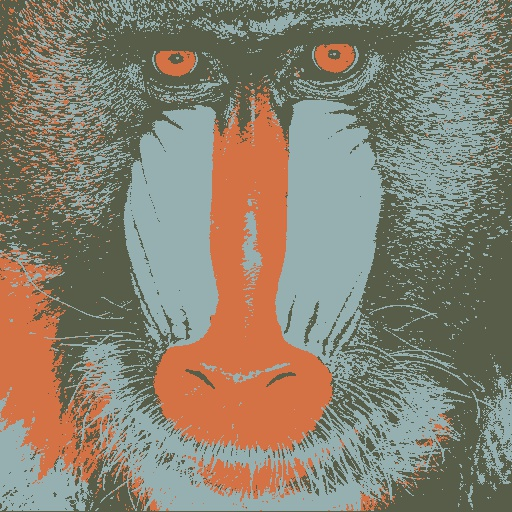

In [112]:
Image(filename ="task3_baboon_3.jpg", width=400, height=400)

### K=5

In [ ]:
# Number of clusters
k =5
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(points)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(points)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
C_z = np.random.randint(0, np.max(points)-20, size=k)
C = np.array(list(zip(C_x, C_y, C_z)), dtype=np.float32)

In [ ]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

clusters = np.zeros(len(points))
# print(clusters.shape)
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(points)):
        distances = dist(points[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = C.copy()
#     print(clusters)
    # Finding the new centroids by taking the average value
    for i in range(k):
        n_points = [points[j] for j in range(len(points)) if clusters[j] == i]
        C[i] = np.nanmean(n_points, axis=0)
#         print(C)
    error = dist(C, C_old, None)

In [ ]:
labels = np.uint8(clusters)
# print(labels)
centers = np.uint8(C)
# print(centers)
less_colors = centers[labels].reshape(img.shape).astype('uint8')
cv2.imwrite('task3_baboon_5.jpg',less_colors)

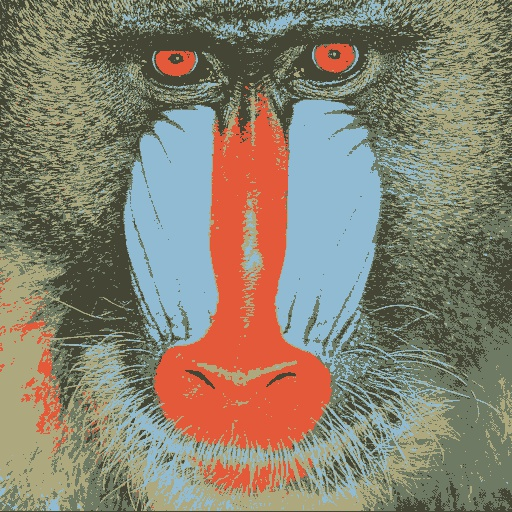

In [123]:
Image(filename ="task3_baboon_5.jpg", width=400, height=400)

### K=10

In [121]:
# Number of clusters
k =10
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(points)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(points)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
C_z = np.random.randint(0, np.max(points)-20, size=k)
C = np.array(list(zip(C_x, C_y, C_z)), dtype=np.float32)

In [ ]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

clusters = np.zeros(len(points))
# print(clusters.shape)
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(points)):
        distances = dist(points[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = C.copy()
#     print(clusters)
    # Finding the new centroids by taking the average value
    for i in range(k):
        n_points = [points[j] for j in range(len(points)) if clusters[j] == i]
        C[i] = np.nanmean(n_points, axis=0)
#         print(C)
    error = dist(C, C_old, None)

In [ ]:
labels = np.uint8(clusters)
# print(labels)
centers = np.uint8(C)
# print(centers)
less_colors = centers[labels].reshape(img.shape).astype('uint8')
cv2.imwrite('task3_baboon_10.jpg',less_colors)

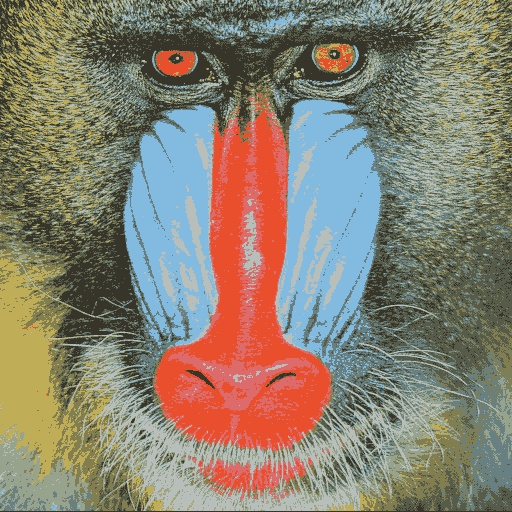

In [115]:
Image(filename ="task3_baboon_10.jpg", width=400, height=400)

### K=20

In [126]:
# Number of clusters
k =20
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(points)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(points)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
C_z = np.random.randint(0, np.max(points)-20, size=k)
C = np.array(list(zip(C_x, C_y, C_z)), dtype=np.float32)

In [ ]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(points))
# print(clusters.shape)
# Error func. - Distance between new centroids and old centroids
# error = dist(C, C_old, None)
error=1
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(points)):
        distances = dist(points[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = C.copy()
#     print(clusters)
    # Finding the new centroids by taking the average value
    for i in range(k):
        n_points = [points[j] for j in range(len(points)) if clusters[j] == i]
        C[i] = np.nanmean(n_points, axis=0)
#         print(C)
#     error = dist(C, C_old, None)
    error =error-1

In [ ]:
labels = np.uint8(clusters)
# print(labels)
centers = np.uint8(C)
# print(centers)
less_colors = centers[labels].reshape(img.shape).astype('uint8')
cv2.imwrite('task3_baboon_20.jpg',less_colors)

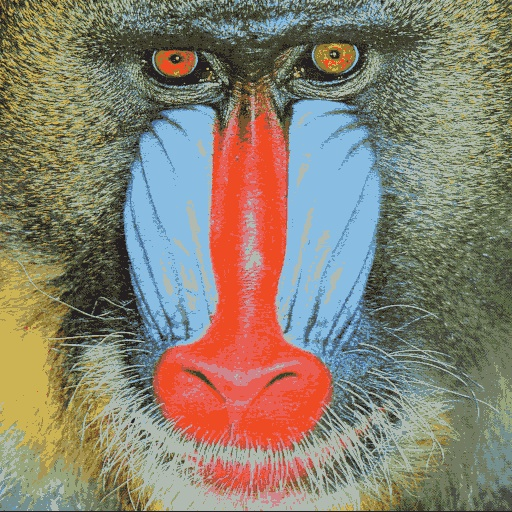

In [128]:
Image(filename ="task3_baboon_20.jpg", width=400, height=400)